In [2]:
# hit or miss transformation - morphological image processing
# learning resource - https://theailearner.com/tag/hit-or-miss-transformation-opencv/
# learning resource - https://docs.opencv.org/master/db/d06/tutorial_hitOrMiss.html
import numpy  as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

'''
(A ^ B) - binary image complement operation
(A & B) - binary image intersection
(A | B) - binary image union
(A & (B ^ 1)) - binary image set difference
'''

'\n(A ^ B) - binary image complement operation\n(A & B) - binary image intersection\n(A | B) - binary image union\n(A & (B ^ 1)) - binary image set difference\n'

Text(0.5, 1.0, 'Complemented Binary Image')

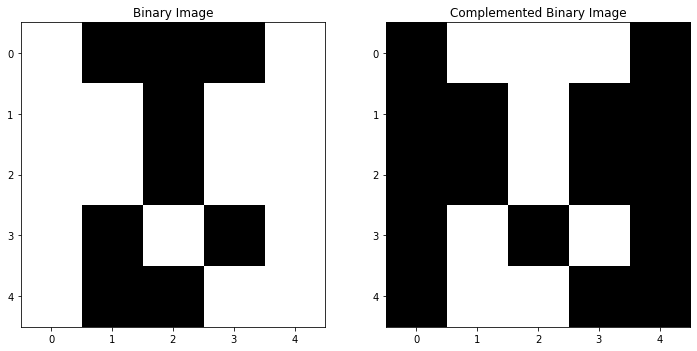

In [3]:
# binary image initialization
binary_image = np.array([[0, 1, 1, 1, 0],\
                         [0, 0, 1, 0, 0],\
                         [0, 0, 1, 0, 0],\
                         [0, 1, 0, 1, 0],\
                         [0, 1, 1, 0, 0]], dtype = np.int32)

# binary image show
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap = "binary")
plt.title("Binary Image")

# compelemented binary image
complemented_binary_image = (binary_image ^ 1)

# complemented binary image show
plt.subplot(1, 2, 2)
plt.imshow(complemented_binary_image, cmap = "binary")
plt.title("Complemented Binary Image")

Text(0.5, 1.0, 'B2 kernel - kernel to miss')

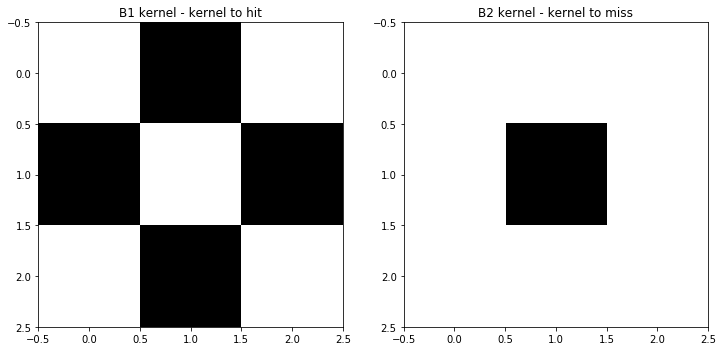

In [4]:
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 1, 0],\
               [1, 0, 1],\
               [0, 1, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(1, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")

# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[0, 0, 0],\
               [0, 1, 0],\
               [0, 0, 0]], dtype = np.int32)
# B2 kernel show
plt.subplot(1, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")

Text(0.5, 1.0, 'Padded Complemented Binary Image')

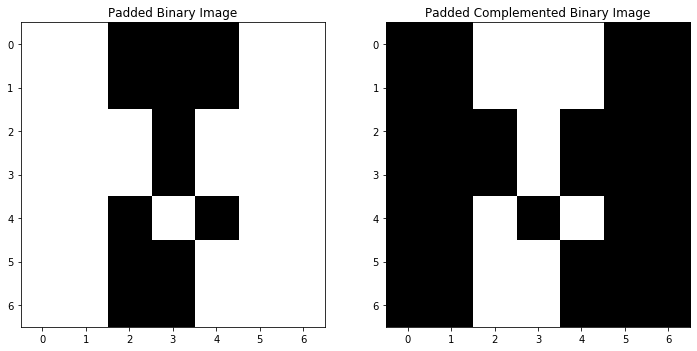

In [5]:
# padded binary image
row, col = binary_image.shape
padded_binary_image = np.array([[0, 0, 1, 1, 1, 0, 0],\
                                [0, 0, 1, 1, 1, 0, 0],\
                                [0, 0, 0, 1, 0, 0, 0],\
                                [0, 0, 0, 1, 0, 0, 0],\
                                [0, 0, 1, 0, 1, 0, 0],\
                                [0, 0, 1, 1, 0, 0, 0],\
                                [0, 0, 1, 1, 0, 0, 0]], dtype = np.int32)

# padded binary image show
plt.subplot(1, 2, 1)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")

# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(1, 2, 2)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")

Text(0.5, 1.0, 'Eroded Complemented Binary Image')

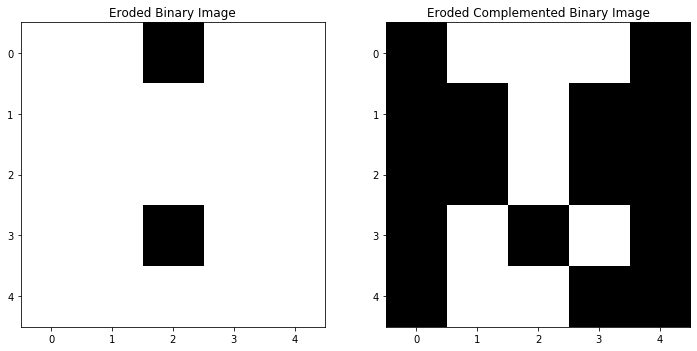

In [6]:
# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 1, 1, 2])
        tmp_col = np.array([1, 0, 2, 1])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show - erosion(A, B1)
plt.subplot(1, 2, 1)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([1])
        tmp_col = np.array([1])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(1, 2, 2)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image")

Text(0.5, 1.0, 'Hit or Miss transformed Image')

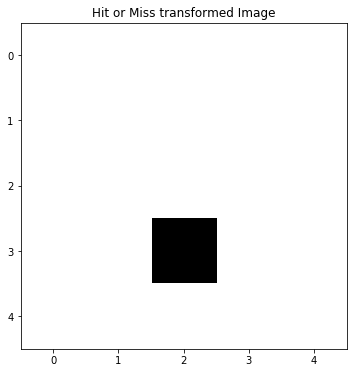

In [7]:
# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")